# **Prediccion de precios de inmuebles**

### **El dataset fue tomado de https://www.kaggle.com/datasets/danieleduardofajardo/colombia-house-prediction**

**Importar las librerias necesarias**

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import copy
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import sklearn
import numpy as np
import math
import matplotlib as mpl
from itertools import *
from sklearn import preprocessing
import random

**Mediante pandas leemos el csv, el cual contiene el DataSet y se imprime**

In [76]:
url="/content/Sales_prediction_Colombia.csv"
df_inmobiliario = pd.read_csv(url, sep=",", header=0)

df_inmobiliario

,Unnamed: 0,antiguedad_original,area,areabalcon,areaconstruida,areaterraza,balcon,banos,banoservicio,conjuntocerrado,...,tiempodeconstruido,tipodegaraje,valor,valorventa,vigilancia,vista,zona_de_bbq,zonadelavanderia,zonaninos,zonasverdes
0,0,Entre 5 y 10 años,145.0,10.00,145.0,10.00,Terraza,3.0,NaN,NaN,...,Entre 5 y 10 años,Independiente,9.000000e+08,9.000000e+08,24hrs,Exterior,NaN,Si,NaN,NaN
1,1,Entre 0 y 5 años,114.0,NaN,114.0,NaN,NaN,3.0,NaN,NaN,...,Entre 0 y 5 años,NaN,5.481475e+08,5.481475e+08,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Entre 5 y 10 años,170.0,30.00,170.0,30.00,Terraza,4.0,NaN,Si,...,Entre 5 y 10 años,Propio,1.500000e+09,1.500000e+09,NaN,Exterior,NaN,Si,NaN,Si
3,3,Entre 0 y 5 años,61.0,NaN,61.0,NaN,Balcón,1.0,NaN,NaN,...,Entre 0 y 5 años,Independiente,4.950000e+08,4.950000e+08,24hrs,Exterior,NaN,NaN,NaN,NaN
4,4,Más de 20 años,120.5,NaN,120.5,NaN,NaN,3.0,NaN,NaN,...,Más de 20 años,Servidumbre,8.500000e+08,8.500000e+08,Si,NaN,NaN,Si,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145547,145547,Entre 0 y 5 años,118.0,NaN,118.0,NaN,NaN,3.0,NaN,NaN,...,Entre 0 y 5 años,NaN,8.000000e+08,8.000000e+08,NaN,NaN,NaN,Si,NaN,NaN
145548,145548,Entre 0 y 5 años,89.0,10.00,89.0,10.00,Terraza,3.0,NaN,NaN,...,Entre 0 y 5 años,Propio,3.200000e+08,3.200000e+08,NaN,Exterior,NaN,Si,NaN,NaN
145549,145549,Entre 0 y 5 años,88.0,NaN,88.0,NaN,NaN,3.0,NaN,NaN,...,Entre 0 y 5 años,NaN,9.500000e+08,9.500000e+08,NaN,NaN,NaN,NaN,NaN,NaN
145550,145550,Entre 10 y 20 años,173.0,25.68,173.0,25.68,Terraza,3.0,NaN,NaN,...,Entre 10 y 20 años,NaN,1.450000e+09,1.450000e+09,24hrs,Exterior,NaN,Si,NaN,NaN


**Imprimimos la informacion del DataSet**

In [77]:
df_inmobiliario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145552 entries, 0 to 145551
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             145552 non-null  int64  
 1   antiguedad_original    145552 non-null  object 
 2   area                   145528 non-null  float64
 3   areabalcon             24357 non-null   float64
 4   areaconstruida         145528 non-null  float64
 5   areaterraza            24357 non-null   float64
 6   balcon                 78145 non-null   object 
 7   banos                  145016 non-null  float64
 8   banoservicio           1116 non-null    object 
 9   conjuntocerrado        67528 non-null   object 
 10  cuarto_de_escoltas     3734 non-null    object 
 11  cuartodeservicio       28343 non-null   object 
 12  depositoocuartoutil    57456 non-null   object 
 13  depositos              41538 non-null   object 
 14  estrato                138885 non-nu

**Realizamos un heatmap para ver los nulos de cada columna**

<Axes: >

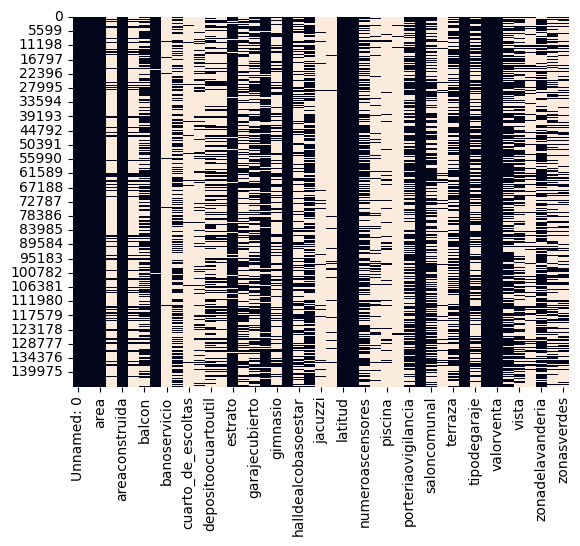

In [78]:
sns.heatmap(df_inmobiliario.isnull(), cbar=False)

**Selección de variables que se toman para el estudio (seleccionadas debido a que son las variables fisicas con menos nulos, por lo que pueden ser mas exactas)**

In [79]:
df_variablesEstudio=df_inmobiliario[['area', 'areaconstruida','banos','estrato', 'habitaciones','garajes','valor']]
df_variablesEstudio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145552 entries, 0 to 145551
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   area            145528 non-null  float64
 1   areaconstruida  145528 non-null  float64
 2   banos           145016 non-null  float64
 3   estrato         138885 non-null  float64
 4   habitaciones    145540 non-null  float64
 5   garajes         131688 non-null  float64
 6   valor           145552 non-null  float64
dtypes: float64(7)
memory usage: 7.8 MB


**Realizamos un describe para analizar la estadistica basica de cada columna**

In [80]:
df_variablesEstudio.describe()

,area,areaconstruida,banos,estrato,habitaciones,garajes,valor
count,145528.000000,145528.000000,145016.000000,138885.000000,145540.000000,131688.000000,1.455520e+05
mean,137.033261,137.033261,2.593004,4.768557,2.606651,1.750683,1.401152e+09
std,2130.744767,2130.744767,1.029160,1.146063,0.865364,0.773695,2.829434e+10
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000e+00
25%,66.980000,66.980000,2.000000,4.000000,2.000000,1.000000,3.200000e+08
50%,92.000000,92.000000,2.000000,5.000000,3.000000,2.000000,4.900000e+08
75%,138.000000,138.000000,3.000000,6.000000,3.000000,2.000000,8.200000e+08
max,570000.000000,570000.000000,52.000000,7.000000,86.000000,10.000000,4.100000e+12


**Realizamos la matriz de correlacion entre las columnas para analizar su comportamiento**

                    area  areaconstruida     banos   estrato  habitaciones  \
area            1.000000        1.000000  0.024480  0.013047      0.018882   
areaconstruida  1.000000        1.000000  0.024480  0.013047      0.018882   
banos           0.024480        0.024480  1.000000  0.499191      0.475339   
estrato         0.013047        0.013047  0.499191  1.000000     -0.005014   
habitaciones    0.018882        0.018882  0.475339 -0.005014      1.000000   
garajes         0.040061        0.040061  0.639138  0.522280      0.296917   
valor           0.001224        0.001224  0.027711  0.027941      0.001151   

                 garajes     valor  
area            0.040061  0.001224  
areaconstruida  0.040061  0.001224  
banos           0.639138  0.027711  
estrato         0.522280  0.027941  
habitaciones    0.296917  0.001151  
garajes         1.000000  0.019328  
valor           0.019328  1.000000  


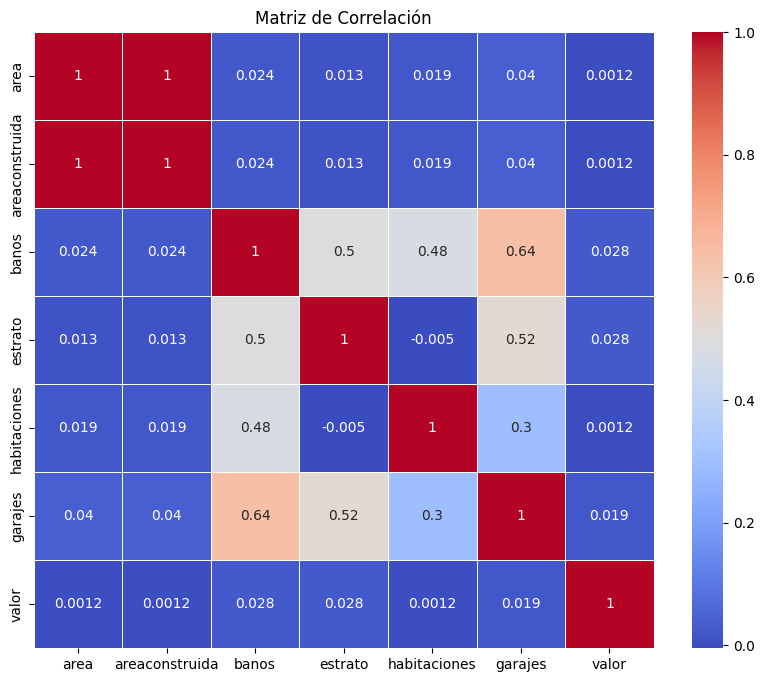

In [81]:
# Generar la matriz de correlación solo para columnas numéricas
correlation_matrix = df_variablesEstudio.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

# Visualizar la matriz con un mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

**Realizamos un histograma de cada columna para analizar el comportamiento**

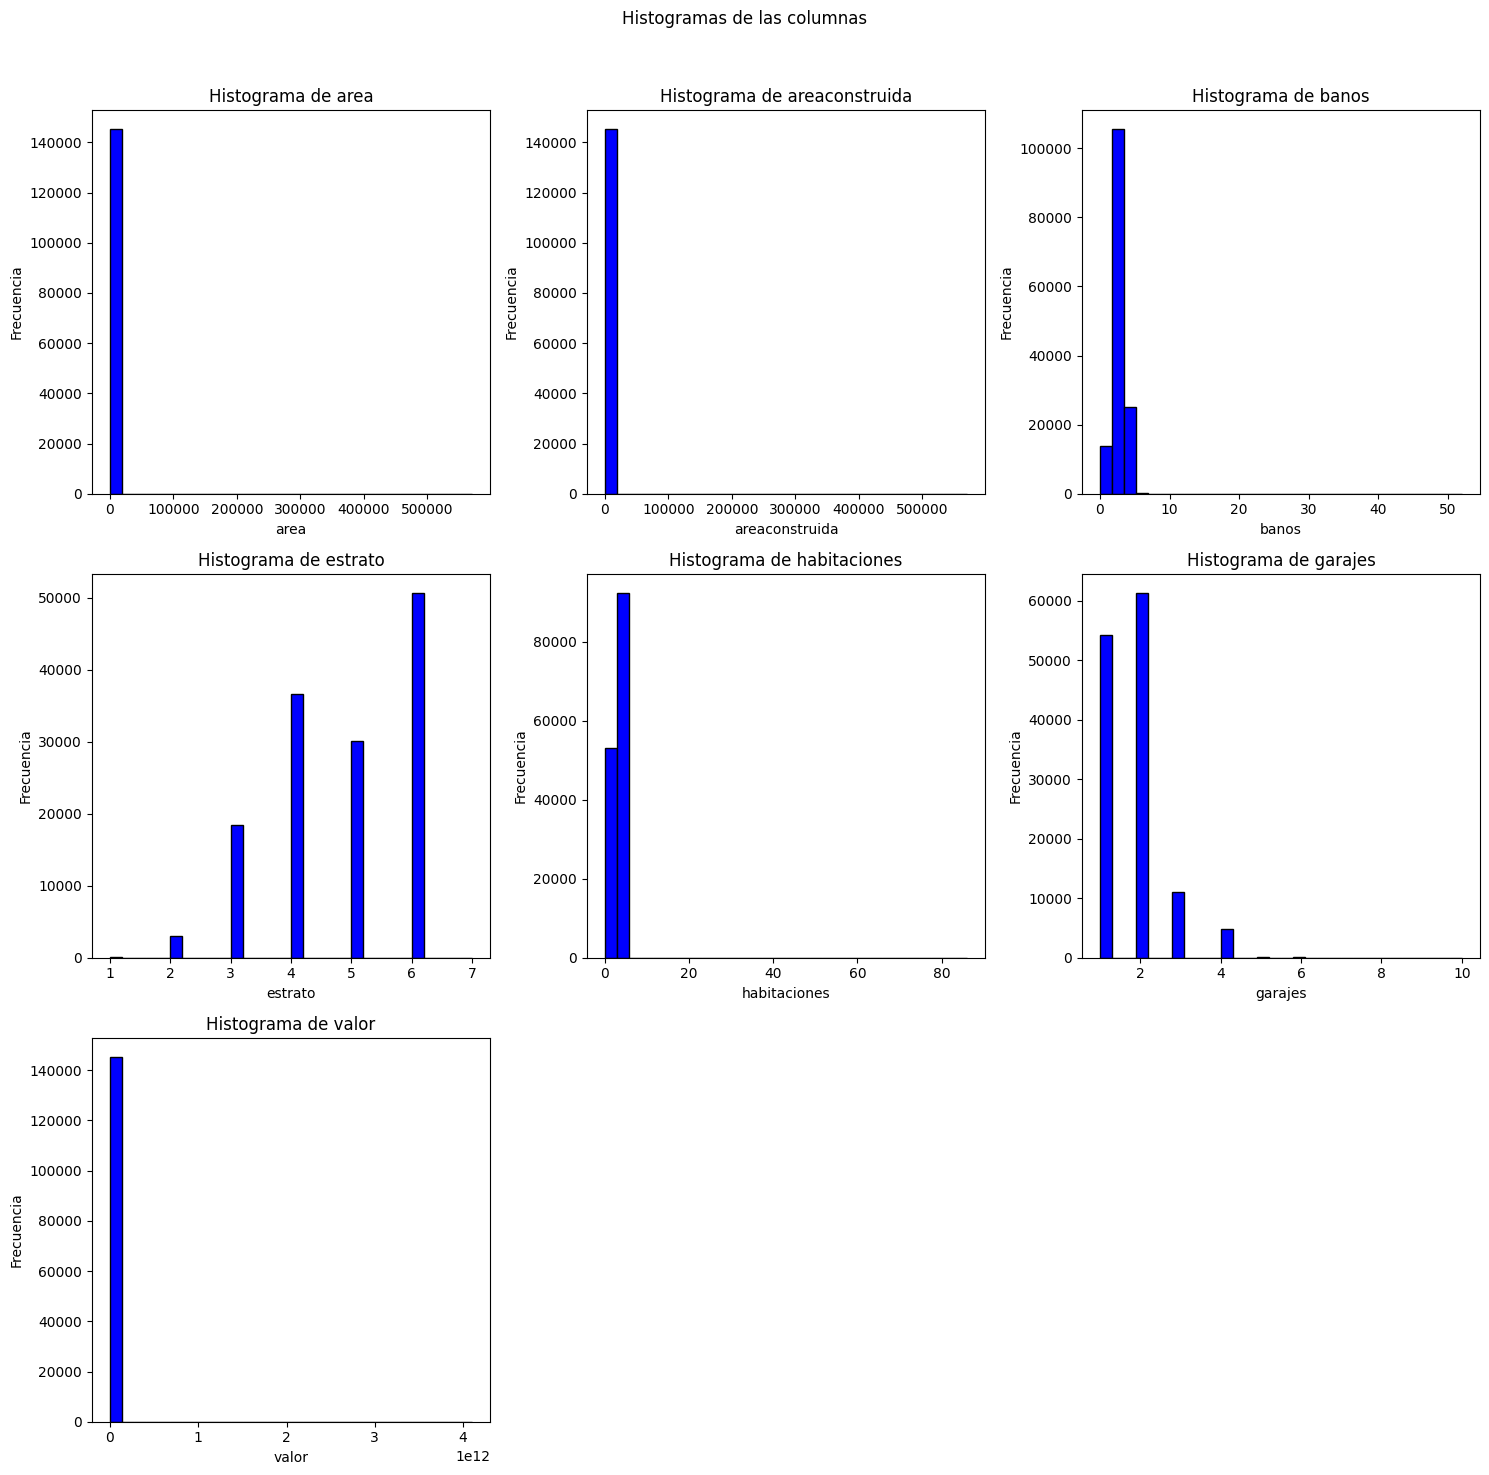

In [82]:
# Lista de columnas a graficar
columns_to_plot = ['area', 'areaconstruida', 'banos', 'estrato', 'habitaciones', 'garajes', 'valor']

# Calcular el número de filas y columnas necesarias para los subplots
num_columns = 3  # Número de columnas en la cuadrícula de gráficos
num_rows = math.ceil(len(columns_to_plot) / num_columns)  # Calcular cuántas filas se necesitan

# Crear una figura y subplots para cada columna
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 5 * num_rows))  # Ajusta el tamaño de la figura dinámicamente
fig.suptitle('Histogramas de las columnas')

# Si sólo hay una fila de subplots, convertir 'axes' en una lista para iterar fácilmente
if num_rows == 1:
    axes = [axes]

# Iterar sobre cada columna y crear un histograma
for i, col in enumerate(columns_to_plot):
    ax = axes[i // num_columns, i % num_columns]  # Ajusta el índice para ubicarlo en la cuadrícula
    ax.hist(df_inmobiliario[col], bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Histograma de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

# Eliminar los subplots vacíos si no se usan todos
for j in range(i + 1, num_rows * num_columns):
    fig.delaxes(axes[j // num_columns, j % num_columns])

# Ajustar el diseño para que no se superpongan los gráficos
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Mostrar el gráfico
plt.show()

**Realizamos un conteo de los nulos que contiene cada una de las columnas**

In [83]:
df_variablesEstudio.isnull().sum()

,0
area,24
areaconstruida,24
banos,536
estrato,6667
habitaciones,12
garajes,13864
valor,0


**Al ver que los nulos no representan una cantidad importante en el dataframe, procedemos a eliminarlos para limpiar el df**

In [84]:
nuevo_df_variablesEstudio=df_variablesEstudio.dropna(subset=['area','areaconstruida','banos','estrato', 'habitaciones','garajes', 'valor'])

**Nuevamente realizamos un conteo de los nulos que contiene cada una de las columnas para verificar que estas ya no tengan nulos**

In [85]:
nuevo_df_variablesEstudio.isnull().sum()

,0
area,0
areaconstruida,0
banos,0
estrato,0
habitaciones,0
garajes,0
valor,0


**Se calculan los percentiles 0.5% y 95% de las columnas numéricas en nuevo_df_variablesEstudio, luego, se filtran las filas de nuevo_df_variablesEstudio para incluir solo aquellas cuyos valores están dentro del rango definido por estos percentiles.**

In [86]:
percentile_up = nuevo_df_variablesEstudio.quantile(0.005)
percentile_down = nuevo_df_variablesEstudio.quantile(0.95)
nuevo_df_variablesEstudio = nuevo_df_variablesEstudio[(nuevo_df_variablesEstudio >= percentile_up) & (nuevo_df_variablesEstudio <= percentile_down)]

**se eliminan los valores extremos (muy bajos o muy altos) en las columnas seleccionadas**

In [87]:

nuevo_df_variablesEstudio = nuevo_df_variablesEstudio.dropna(subset=['area','areaconstruida','banos','estrato', 'habitaciones','garajes', 'valor'])


**Imprimimos la informacion del dataframe nuevo_df_variablesEstudio y nos percatamos que cada columnna esta completa**

In [88]:
nuevo_df_variablesEstudio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113614 entries, 0 to 145551
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   area            113614 non-null  float64
 1   areaconstruida  113614 non-null  float64
 2   banos           113614 non-null  float64
 3   estrato         113614 non-null  float64
 4   habitaciones    113614 non-null  float64
 5   garajes         113614 non-null  float64
 6   valor           113614 non-null  float64
dtypes: float64(7)
memory usage: 6.9 MB


**Realizamos un .describe para obtenter la estadistica basica del dataframe nuevo_df_variablesEstudio**

In [89]:
nuevo_df_variablesEstudio.describe()

,area,areaconstruida,banos,estrato,habitaciones,garajes,valor
count,113614.000000,113614.000000,113614.000000,113614.000000,113614.000000,113614.000000,1.136140e+05
mean,104.677870,104.677870,2.560327,4.840627,2.543824,1.615901,5.977144e+08
std,46.641858,46.641858,0.877426,1.036479,0.749201,0.592119,3.470626e+08
min,20.000000,20.000000,1.000000,2.000000,1.000000,1.000000,1.296045e+08
25%,69.000000,69.000000,2.000000,4.000000,2.000000,1.000000,3.400000e+08
50%,93.000000,93.000000,2.000000,5.000000,3.000000,2.000000,4.950000e+08
75%,129.000000,129.000000,3.000000,6.000000,3.000000,2.000000,7.500000e+08
max,268.000000,268.000000,5.000000,6.000000,4.000000,3.000000,1.900000e+09


**Imprimimos los valores maximos de cada una de las columnas y debido a que hay caracteristicas en escala diferente debemos normalizar**

In [90]:
maximos=nuevo_df_variablesEstudio.max()
maximos

,0
area,2.680000e+02
areaconstruida,2.680000e+02
banos,5.000000e+00
estrato,6.000000e+00
habitaciones,4.000000e+00
garajes,3.000000e+00
valor,1.900000e+09


**Imprimimos los valores minimos de cada columna y debido a que hay caracteristicas en escala diferente debemos normalizar**

In [91]:
maximos=nuevo_df_variablesEstudio.min()
maximos

,0
area,20.0
areaconstruida,20.0
banos,1.0
estrato,2.0
habitaciones,1.0
garajes,1.0
valor,129604500.0


**Se define una función para normalizar los datos (Min-Max normalization) y aplica esta normalización al DataFrame nuevo_df_variablesEstudio.**

In [92]:
def minmax_norm(df):
    return (df - df.min()) / ( df.max() - df.min())

In [93]:
nuevo_df_variablesEstudio = minmax_norm(nuevo_df_variablesEstudio)

**Creacion del dataset de entrenamioento y prueba donde el 70% es para entrenar y el 30% para probar**

In [94]:
train, test = train_test_split(nuevo_df_variablesEstudio, test_size=0.3)

**Separación de variables independientes (X) y dependiente (Y), se extraen las variables independientes (X) y la variable dependiente (Y) para el conjunto de entrenamiento. Luego, se convierte a matrices NumPy y se aplanan los datos de Y (ytrain.ravel()).**

In [95]:
xtrain=train[["area",'areaconstruida', "banos", "estrato", "habitaciones", "garajes"]]
print(xtrain)

            area  areaconstruida  banos  estrato  habitaciones  garajes
103269  0.604839        0.604839   0.50     1.00      0.666667      0.5
124719  0.166613        0.166613   0.25     0.25      0.333333      0.0
26865   0.798387        0.798387   0.75     0.75      0.666667      0.5
62701   0.870968        0.870968   1.00     1.00      1.000000      1.0
132132  0.137097        0.137097   0.25     0.75      0.333333      0.0
...          ...             ...    ...      ...           ...      ...
41528   0.346774        0.346774   0.25     0.50      0.666667      0.0
143808  0.995968        0.995968   0.75     1.00      0.666667      0.5
65367   0.600806        0.600806   0.25     1.00      0.666667      0.5
144089  0.294355        0.294355   0.25     0.75      0.666667      0.5
48784   0.346774        0.346774   0.25     0.75      0.666667      0.5

[79529 rows x 6 columns]


In [96]:
xtrain=xtrain.to_numpy()
print(xtrain)

[[0.60483871 0.60483871 0.5        1.         0.66666667 0.5       ]
 [0.1666129  0.1666129  0.25       0.25       0.33333333 0.        ]
 [0.7983871  0.7983871  0.75       0.75       0.66666667 0.5       ]
 ...
 [0.60080645 0.60080645 0.25       1.         0.66666667 0.5       ]
 [0.29435484 0.29435484 0.25       0.75       0.66666667 0.5       ]
 [0.34677419 0.34677419 0.25       0.75       0.66666667 0.5       ]]


In [97]:
ytrain=train[["valor"]]
ytrain=ytrain.to_numpy()
ytrain=ytrain.ravel()
print(ytrain)

[0.56506894 0.05953218 0.71757723 ... 0.57636585 0.20328537 0.25383904]


**Procesamiento de los datos de prueba, se realiza el procedimiento de separación de variables y conversión a NumPy para el conjunto de prueba.**

In [98]:
xtest=test[["area",'areaconstruida', "banos", "estrato", "habitaciones", "garajes"]]
print(xtest)

            area  areaconstruida  banos  estrato  habitaciones  garajes
35069   0.343790        0.343790   0.50     0.75      0.333333      0.5
70950   0.544355        0.544355   0.50     1.00      0.666667      0.5
15315   0.201613        0.201613   0.25     0.50      0.666667      0.0
137780  0.342742        0.342742   0.50     1.00      0.666667      0.5
113122  0.330645        0.330645   0.50     0.75      0.666667      0.5
...          ...             ...    ...      ...           ...      ...
110902  0.229839        0.229839   0.25     0.50      0.666667      0.0
26761   0.294355        0.294355   0.25     0.75      0.666667      0.0
132419  0.229839        0.229839   0.25     0.75      0.333333      0.0
7651    0.725806        0.725806   0.50     0.50      0.666667      0.5
51198   0.286290        0.286290   0.50     0.75      0.333333      0.0

[34085 rows x 6 columns]


In [99]:
xtest=xtest.to_numpy()
print(xtest)

[[0.34379032 0.34379032 0.5        0.75       0.33333333 0.5       ]
 [0.54435484 0.54435484 0.5        1.         0.66666667 0.5       ]
 [0.2016129  0.2016129  0.25       0.5        0.66666667 0.        ]
 ...
 [0.22983871 0.22983871 0.25       0.75       0.33333333 0.        ]
 [0.72580645 0.72580645 0.5        0.5        0.66666667 0.5       ]
 [0.28629032 0.28629032 0.5        0.75       0.33333333 0.        ]]


In [100]:
ytest=test[["valor"]]
ytest=ytest.to_numpy()
ytest=ytest.ravel()
print(ytest)

[0.38564631 0.35042763 0.09059868 ... 0.17476067 0.59048698 0.1391754 ]


**Construccion del modelo de regresion mediante MLPRegressor con la función de activación 'logistic' y varios parámetros personalizados, como el número de capas ocultas (5,3,1) y el número máximo de iteraciones (max_iter=50).**

In [101]:
reg = MLPRegressor(solver='adam', activation='logistic', alpha=0.0001,tol=1e-10,
                    hidden_layer_sizes=(5,3,1,),learning_rate='constant',
                    learning_rate_init=0.001, max_iter=50, momentum=0.9, verbose=True)

**Se entrena el modelo con los datos de entrenamiento (xtrain, ytrain).**

In [102]:
reg.fit(xtrain,ytrain)

Iteration 1, loss = 0.01921264
Iteration 2, loss = 0.01630625
Iteration 3, loss = 0.00657617
Iteration 4, loss = 0.00392025
Iteration 5, loss = 0.00368586
Iteration 6, loss = 0.00362775
Iteration 7, loss = 0.00360434
Iteration 8, loss = 0.00358504
Iteration 9, loss = 0.00357252
Iteration 10, loss = 0.00356256
Iteration 11, loss = 0.00355131
Iteration 12, loss = 0.00354387
Iteration 13, loss = 0.00353528
Iteration 14, loss = 0.00352428
Iteration 15, loss = 0.00351875
Iteration 16, loss = 0.00351428
Iteration 17, loss = 0.00350863
Iteration 18, loss = 0.00350270
Iteration 19, loss = 0.00349834
Iteration 20, loss = 0.00349181
Iteration 21, loss = 0.00349693
Iteration 22, loss = 0.00348917
Iteration 23, loss = 0.00348740
Iteration 24, loss = 0.00348493
Iteration 25, loss = 0.00348326
Iteration 26, loss = 0.00348319
Iteration 27, loss = 0.00347869
Iteration 28, loss = 0.00347841
Iteration 29, loss = 0.00347840
Iteration 30, loss = 0.00347660
Iteration 31, loss = 0.00347596
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='logistic', hidden_layer_sizes=(5, 3, 1), max_iter=50,
             tol=1e-10, verbose=True)

**Se grafica la curva de pérdida durante el entrenamiento para visualizar cómo disminuyen las pérdidas con el tiempo.**

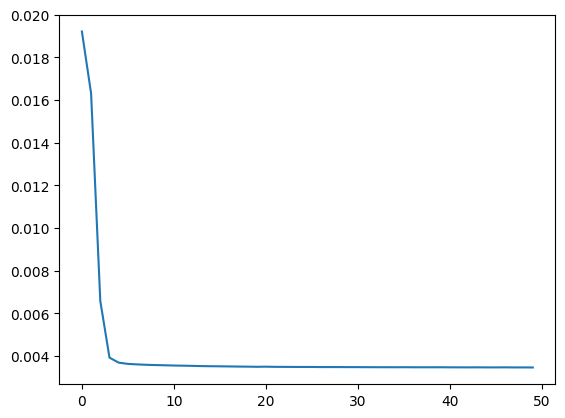

In [103]:
plt.plot(reg.loss_curve_)

**Se realizan predicciones sobre los datos de prueba (xtest) y se evalúa el modelo usando el coeficiente de determinación R² el MAE y el MSE**

In [104]:
# Evaluamos el rendimiento del modelo

test_pred = reg.predict(xtest)

mae = mean_absolute_error(ytest, test_pred)
mse = mean_squared_error(ytest, test_pred)
r2 = r2_score(ytest, test_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 0.05657812882786218
Mean Squared Error (MSE): 0.00695613633777074
R^2 Score: 0.8199473063574664


**Se visualizan las primeras 10 predicciones comparándolas con los valores reales mediante un gráfico de dispersión.**

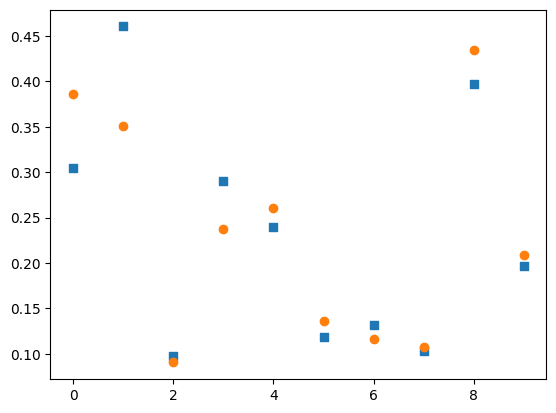

In [105]:
m_x=(xtest[:10])
m_y=(ytest[:10])

m_p=reg.predict(m_x)

x=range(0,len(m_p))

fig=plt.figure()
ax1 = fig.add_subplot()
ax1.scatter(x,m_p, marker="s", label='predict')
ax1.scatter(x,m_y, marker="o", label='real')
plt.show()

**Los valores siguientes se obtienen tomando el valor de cada atributo en su orden y normalizandolo teniendo en cuenta la funcion de normalización, el máximo y el mínimp y se realiza una predicción sobre un inmueble con valores de entrada y se muestra el resultado**

In [106]:
input=[0.22983871,0.22983871,0.25,0.5,0.33333333,0.5]


pred=reg.predict([input])
res=pred*1.900000e+09
print('valor del inmueble:',format(res[0], '0.2f'))

valor del inmueble: 294180908.81


# Análisis de Resultados

Al evaluar el modelo de regresión neuronal utilizando el **MLPRegressor**, se obtuvieron los siguientes resultados:

- **Mean Absolute Error (MAE):** `0.0565`
- **Mean Squared Error (MSE):** `0.0068`
- **R² Score:** `0.8199`

## Interpretación de los Resultados:

1. **MAE:** El valor del MAE indica que, en promedio, el modelo tiene un error absoluto del 5.65% en la predicción del valor de los inmuebles normalizados. Un valor bajo de MAE es positivo, ya que indica que el modelo predice valores cercanos a los reales.
2. **MSE:** El MSE de 0.0068 muestra el error cuadrático medio, penalizando más los errores grandes. Este valor refuerza la idea de que el modelo es bastante preciso en sus predicciones, ya que el error promedio es bajo.
3. **R² Score:** El R² de 0.8199 indica que el modelo puede explicar aproximadamente el 81.99% de la variabilidad en los datos de prueba. Este valor sugiere que el modelo tiene un buen poder predictivo, aunque hay un 18.01% de la variabilidad que no está capturada, lo que podría deberse a factores externos o ruido en los datos.

---

# Graficas

1. **Curva de Pérdida:** La curva de pérdida, representada durante el entrenamiento, muestra cómo disminuyen las pérdidas a medida que avanza el entrenamiento del modelo. Esto es esencial para verificar que el modelo no está sobreajustado ni subajustado, y la convergencia indica que se ha encontrado un mínimo local satisfactorio..
2. **Comparación de Predicciones vs Valores Reales:** La gráfica de dispersión que compara las primeras 10 predicciones con los valores reales demuestra visualmente cómo el modelo predice bastante cerca de los valores reales, aunque se pueden observar pequeñas desviaciones. Estas diferencias son esperadas en modelos de regresión y, en este caso, no parecen ser significativas.

---

# Conclusiones

1. **Desempeño satisfactorio del modelo:** El valor de **R²** de `0.8199` demuestra que el modelo de red neuronal entrenado es capaz de predecir los valores de los inmuebles con un alto grado de precisión. Si bien no es perfecto, su capacidad de capturar más del 80% de la variabilidad es indicativa de un buen ajuste.
2. **Error bajo y aceptable:** El MAE y el MSE bajos sugieren que las predicciones están lo suficientemente cerca de los valores reales, minimizando errores en términos absolutos y cuadráticos.
3. **Eficacia de la normalización:** El uso de la normalización ha facilitado que el modelo de red neuronal maneje correctamente las distintas escalas de los datos de entrada, mejorando su capacidad de convergencia y predicción.
4. **Espacio para mejoras:** A pesar de los buenos resultados, todavía existe un `18.01%` de variabilidad que el modelo no está capturando. Esto sugiere que podrían incorporarse mejoras, como la inclusión de más datos, la ingeniería de características adicionales, o el ajuste de hiperparámetros..

---

# Recomendaciones

1. **Ajuste de Hiperparámetros:** Sería útil explorar una mayor cantidad de iteraciones (max_iter) para el modelo de MLPRegressor, así como variar el número de neuronas en cada capa oculta para intentar mejorar el ajuste del modelo.
2. **Evaluar con más datos:** Aunque el modelo ha mostrado buenos resultados con los datos actuales, es recomendable realizar pruebas con conjuntos de datos más grandes o más diversos para validar la robustez del modelo en otros contextos.
3. **Ingeniería de Características:** Se podría explorar agregar más características que puedan influir en el valor de los inmuebles, como la proximidad a servicios públicos, escuelas, transporte, o índices económicos de la región.
4. **Regularización y Prevención de Overfitting:** Aunque el modelo no muestra signos evidentes de sobreajuste, podríamos implementar técnicas adicionales de regularización como el uso de dropout en las capas o aumentar el parámetro de regularización alpha en el MLPRegressor.
5. **Optimización de Funciones de Activación y Solvers:** También es recomendable explorar otras funciones de activación (como relu o tanh) y otros métodos de optimización (solvers) como lbfgs para comparar su impacto en el rendimiento del model

Video de Youtube: Añadido en el repositorio https://github.com/andresr02799/TalentoTech